# Excercise
Get to know EDA (Exploratory Data Analysis)
- `Pandas` for data loading, data cleaning 
- `matplotlib`, `seaborn` for data visualization
- Feature Engineering for tabular data


We have a dataset that includes almost **features of houses**. The goal is to predict the **sales price** of each house.
We try to understand the dataset and get some insights.
Note that understanding data is the first and also the most important of an AI project. So have fun with this :)

## Load libraries and data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

1. Oops, no module named ...? Please fix this.

In [3]:
test = pd.read_csv('./data/test.csv')
train = pd.read_csv('./data/train.csv')
info = {}

In [4]:
with open ('data/data_description.txt') as f:
    for line in f:
        for feature in train.columns:
            if line.startswith(feature):
                info[feature] = line.split(':')[1]
print(info)

{'MSSubClass': ' Identifies the type of dwelling involved in the sale.\t\n', 'MSZoning': ' Identifies the general zoning classification of the sale.\n', 'LotFrontage': ' Linear feet of street connected to property\n', 'LotArea': ' Lot size in square feet\n', 'Street': ' Type of road access to property\n', 'Alley': ' Type of alley access to property\n', 'LotShape': ' General shape of property\n', 'LandContour': ' Flatness of the property\n', 'Utilities': ' Type of utilities available\n', 'LotConfig': ' Lot configuration\n', 'LandSlope': ' Slope of property\n', 'Neighborhood': ' Physical locations within Ames city limits\n', 'Condition1': ' Proximity to various conditions\n', 'Condition2': ' Proximity to various conditions (if more than one is present)\n', 'BldgType': ' Type of dwelling\n', 'HouseStyle': ' Style of dwelling\n', 'OverallQual': ' Rates the overall material and finish of the house\n', 'OverallCond': ' Rates the overall condition of the house\n', 'YearBuilt': ' Original cons

2. Ok, let's load the dataset to Pandas's dataframes:

In [5]:
df = pd.DataFrame(test)
df2 = pd.DataFrame(train)

Let's see the data

### Data Exploration
Let's try to answer all questions below (with source code and graphs if needed).

3. Check types of each column

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

4. How many columns (features), rows of this dataset?

In [7]:
print(test.shape) 
print(train.shape)

(1459, 80)
(1460, 81)


5. How many numerical features, time features, discrete features, continuous features, categoricals features? Find basic statistics (min, max, mean, standard deviation) of each features.

In [8]:
numerical= train.select_dtypes(include = ['float','int'])
time_features = train[[x for x in train.columns if 'Year' in x]]
discrete = train.select_dtypes(column for column in train.columns if column not in numerical and column not in time_features)
continuous = train.select_dtypes(include = 'number')
categorical_train = train.select_dtypes(exclude = 'number')
print("Numerical features: " + str(len(numerical.columns)))
print("Time features: " + str(len(time_features.columns)))
print("Discrete features: " + str(len(discrete.columns)))
print("Continuous features: " + str(len(continuous.columns)))
print("Categorical features: " + str(len(categorical_train.columns)))

statistics_num = numerical.describe().loc[['min','max','mean','std']]
statistics_time = time_features.describe().loc[['min','max','mean','std']]
statistics_discrete = discrete.describe().loc[['min','max','mean','std']]
statistics_continuous = continuous.describe().loc[['min','max','mean','std']]
statistics_continuous

Numerical features: 38
Time features: 2
Discrete features: 81
Continuous features: 38
Categorical features: 43


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883


6. How many duplicated rows?

In [9]:
print(test.duplicated().sum())
print(train.duplicated().sum())

0
0


7. How many missing values of each feature?

In [10]:
pd.options.display.max_rows = 81 
pd.options.display.max_columns = 81
df2 = train.isnull().sum()
df2.drop([i for i in df2.index if df2.loc[i] == 0], inplace =True)
df2

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

8. Count unique values of each feature

In [11]:
test.nunique()

Id               1459
MSSubClass         16
MSZoning            5
LotFrontage       115
LotArea          1106
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           1
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          5
BldgType            5
HouseStyle          7
OverallQual        10
OverallCond         9
YearBuilt         106
YearRemodAdd       61
RoofStyle           6
RoofMatl            4
Exterior1st        13
Exterior2nd        15
MasVnrType          4
MasVnrArea        303
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        669
BsmtFinType2        6
BsmtFinSF2        161
BsmtUnfSF         793
TotalBsmtSF       736
Heating             4
HeatingQC           5
CentralAir          2
Electrical          4
1stFlrSF          789
2ndFlrSF          407
LowQualFin

9. Plot the distribution of sale price (target). Also check sale price distribution in log scale. Any insights?

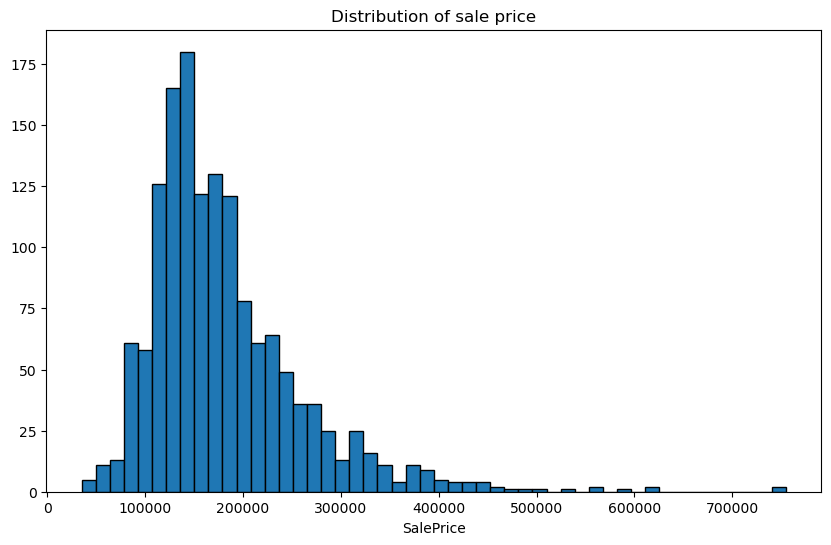

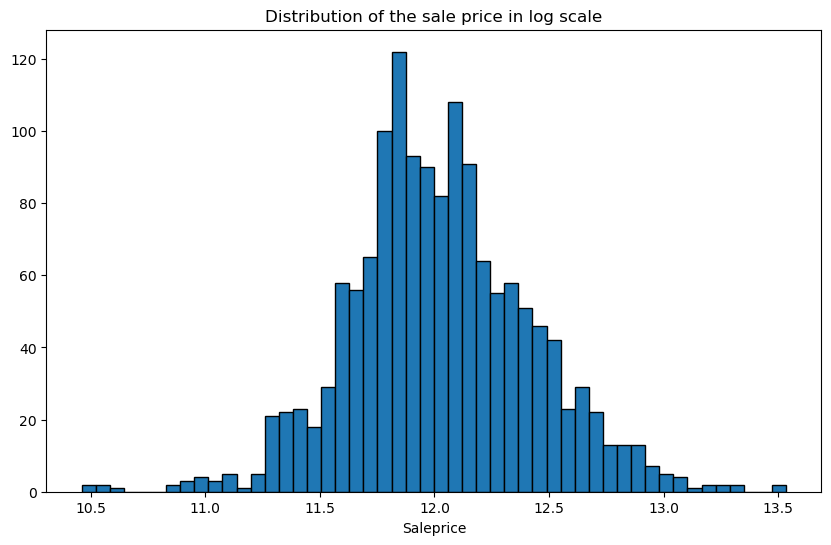

In [19]:
train['SalePrice'] = train['SalePrice'].astype(float)
plt.figure(figsize=(10,6))
plt.xlabel('SalePrice') 
plt.title('Distribution of sale price')
plt.hist(train['SalePrice'],bins = 50, edgecolor = 'black')
plt.show()

plt.figure(figsize =(10,6))
plt.title('Distribution of the sale price in log scale')
plt.xlabel('Saleprice')
plt.hist(np.log(train['SalePrice']), bins =50, edgecolor ='black')
plt.show()

10. Check correlation of each feature to target. Which features are the most important? Any insights? 

In [36]:
Saleprice_corr = train.corr()['SalePrice'][:-1]
print(Saleprice_corr)

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
Name: SalePrice, dtype: float64


In [41]:
filt = Saleprice_corr> 0.5 
good_features = Saleprice_corr[filt].sort_values(ascending = False)
good_features

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

11. Check correlations of numerical features to each others. Any insights?

In [32]:
numerical_corr = train.corr() 
filt = numerical_corr >= 0.5
good_feature = numerical_corr[filt]
good_feature.fillna ('None',inplace =True)
good_feature

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
MSSubClass,None,1.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
LotFrontage,None,None,1.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
LotArea,None,None,None,1.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
OverallQual,None,None,None,None,1.0,None,0.572323,0.550684,None,None,None,None,0.537808,None,None,None,0.593007,None,None,0.5506,None,None,None,None,None,0.547766,0.600671,0.562022,None,None,None,None,None,None,None,None,None,0.790982
OverallCond,None,None,None,None,None,1.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
YearBuilt,None,None,None,None,0.572323,None,1.0,0.592855,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0.825667,0.53785,None,None,None,None,None,None,None,None,None,None,0.522897
YearRemodAdd,None,None,None,None,0.550684,None,0.592855,1.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,0.642277,None,None,None,None,None,None,None,None,None,None,None,0.507101
MasVnrArea,None,None,None,None,None,None,None,None,1.0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
BsmtFinSF1,None,None,None,None,None,None,None,None,None,1.0,None,None,0.522396,None,None,None,None,0.649212,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


12. Do you know skewess and kurtosis? Try to explain them and check this dataset.

13. Check outliers of this dataset

14. Compare train set and test set. Do they have the same distributions?

15. Hypothesis: does sale price go up each year? Confirm it.

In [63]:
year_sale = train.groupby('YrSold')
year_sale['SalePrice'].agg(['median','mean'])

,median,mean
YrSold,,
2006,163995.0,182549.458599
2007,167000.0,186063.151976
2008,164000.0,177360.838816
2009,162000.0,179432.103550
2010,155000.0,177393.674286


16. Hypotheis: seasons (spring, summer, fall, winter) also affect sale price. Confirm it.

In [59]:
def season(x): 
    if x['MoSold'] >=1 and x['MoSold'] <=3 : 
        return 'Spring'
    if x['MoSold'] >=3 and x['MoSold'] <=6 : 
        return 'Summer'
    if x['MoSold'] >=6 and x['MoSold'] <=9 : 
        return 'Autumn'
    if x['MoSold'] >=9 and x['MoSold'] <=12 : 
        return 'Winter'
train['Season'] = train.apply(season, axis=1)
season_sale = train.groupby('Season')
season_sale['SalePrice'].agg(['mean','median'])

,mean,median
Season,,
Autumn,187248.362768,171000.0
Spring,181961.310185,165250.0
Summer,174270.508361,156750.0
Winter,185773.017621,167500.0


17. Think up 3 other hypotheses and confirm them.

### Feature Engineering

18. Numerical features:
- What can we do with these features? How to handle missing values? Do we need to scale each feature?
- Let's practice with our dataset.

19. Categorical features:
- Understand OneHotEncoder, OrdinalEncoder. Do you know Target Encoding? When to use Target Encoding and does it have caveats?
- Try to encode the categorical features in this dataset using suitable encoders above.